In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

In [50]:
def C(F,m):
  return np.sqrt(F*(F+1)-m*(m+1))

In [81]:
# preparation state for the MORS
F = 1
N = 2*F+1 # dimension of the Hilbert space
M = np.linspace(-F,F,N, dtype=int)

# initialize quantum initial state
phi0 = basis(N,0)
for i in range(1,N,1):
    phi0 += basis(N,i) 

phi0 = (1/np.sqrt(N))*phi0

# self construction of spinnor operator
Sigma = Qobj(dims=[[N],[N]]) # initialize et zero N by N matrix quantum object
for i in range(0,N,1):
     for j in range(0,N,1):
        Sigma += basis(N, i)*basis(N, j).dag()

# self construction of Jx operator in hbar unit, where x is the quantization axis
Jx = Qobj(dims=[[N],[N]]) # initialize et zero N by N matrix quantum object
for m in range(0,N,1):
        Jx.data[m,m] = m

# self construction of Jy operator in hbar unit
Jy = Qobj(dims=[[N],[N]]) # initialize et zero N by N matrix quantum object
for m in range(0,N-1,1):
    Jy+=0.5*C(F,M[m])*( basis(N, m+1)*basis(N, m).dag() + basis(N, m)*basis(N, m+1).dag() )

# self construction of Jz operator in hbar unit
Jz = Qobj(dims=[[N],[N]]) # initialize et zero N by N matrix quantum object
for m in range(0,N-1,1):
    Jz+=-0.5*1j*C(F,M[m])*( basis(N, m+1)*basis(N, m).dag() - basis(N, m)*basis(N, m+1).dag() )

# self construction of atome hamiltoninan H0 operator in hbar unit, in absence of By RF field
H0 = Qobj(dims=[[N],[N]]) # initialize et zero N by N matrix quantum object
H0 = Jx + Jx*Jx

print(H0)

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 6.]]


c:\Users\Maimouna\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [85]:
def By(t,arg):
    return np.sin(2*np.pi*t)

Text(0.5, 0, 'Time')

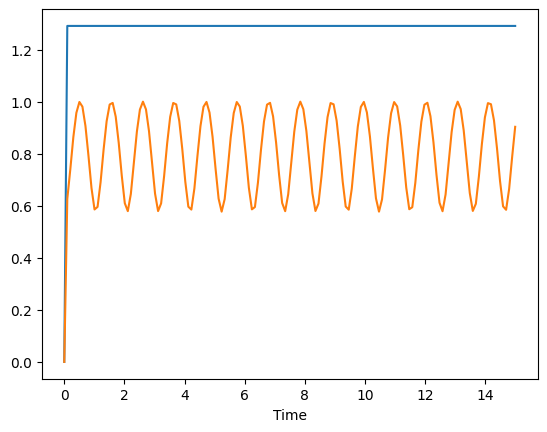

In [112]:
# Simulation of the dynamic in absence of RF Magnetic field

rho0 = phi0*phi0.dag()
rho0 = rho0/np.sqrt(rho0.norm())

opts = Options()
opts.store_states = True
opts.store_final_state = True
#print(opts)

t = np.linspace(0, 15, 150) # Define time vector
output = mesolve(H0, rho0, t, options=opts) # return a list density matrices over time in "output.states"

# evaluation traces of operators, loop on the list
meanJx = np.zeros(len(t))
meanJz = np.zeros(len(t))

for i in range(1,len(t)):
    tempJx = Jx*output.states[i]
    tempJz = Jz*output.states[i]
    meanJx[i] = tempJx.norm()
    meanJz[i] = tempJz.norm()


fig, ax = plt.subplots()
ax.plot(output.times, meanJx) 
ax.plot(output.times, meanJz) 
ax.set_xlabel('Time') 